In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [4]:
RANDOM_STATE = 24
np.random.RandomState(seed=RANDOM_STATE)
rng = np.random.default_rng(seed=RANDOM_STATE)
N_SAMPLE = 1000
NOISE = 0.2
ALPHA = 0.1 # LEARNING RATE
TEST_SIZE = 0.2
EPOCH = 50000


In [5]:
# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (12, 6),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'savefig.dpi': 300,
          'image.cmap': plt.cm.inferno,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }

plt.rcParams.update(params)
# To control the display of floating-point numbers when printing arrays. 
np.set_printoptions(precision=3,  # number of decimal places displayed
                    suppress=True) # prevents the use of scientific notation for small numbers
CMAP = plt.cm.coolwarm
# number of columns displayed when printing a DataFrame
pd.set_option("display.max_columns", 8) # maximum number of columns that will be displayed at once
pd.set_option('display.precision', 2) # precision for floating-point numbers when it’s displayed
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [6]:
# make moons
X, y = datasets.make_moons(shuffle=True, random_state=RANDOM_STATE, n_samples=N_SAMPLE, noise=NOISE) # not having noise will make the graphs look like perfect semi circlular distribution which is not a real world example
X.shape, y.shape

((1000, 2), (1000,))

,A,B,target
0,0.91,0.90,0
1,-1.12,0.76,0
2,1.89,0.42,1
3,-0.93,-0.02,0
4,-0.97,0.06,0


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,

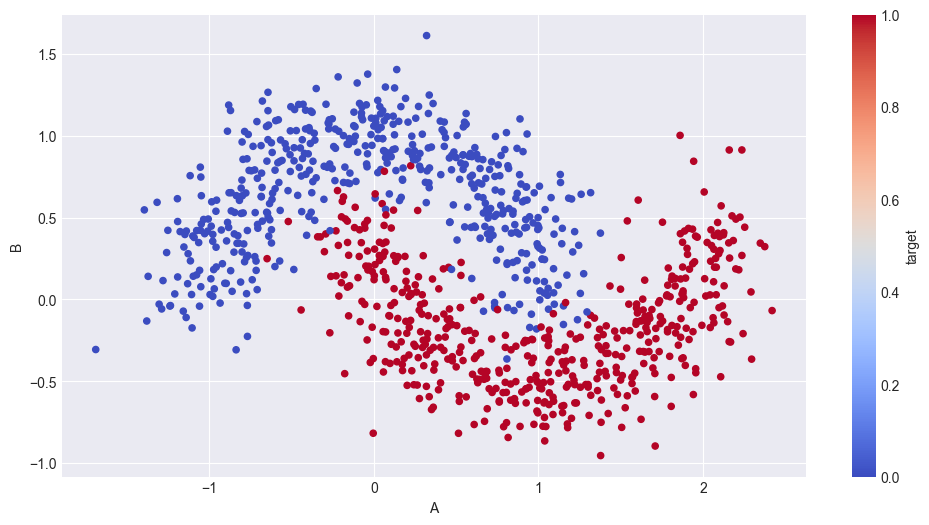

In [7]:
data_df = pd.DataFrame(X, columns=('A', 'B'))
data_df['target'] = y
display(data_df.head())
data_df.plot.scatter('A','B', c = 'target', cmap=CMAP)
display(y)

In [8]:
y=pd.get_dummies(y).to_numpy()
y

array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [9]:
#sigmoid activation function and tanh activation function
def softmax(Z):
    exp_scores = np.exp(Z - np.max(Z)) # avoid negative values
    return exp_scores/ np.sum(exp_scores, axis=1, keepdims=True)

def fn_acty(z):
    return np.tanh(z)
def fn_acty_prime(z): # differentiation of tanh = 1 - tanh**2
    return 1 - (np.tanh(z))**2

def fn_calculate_loss(model, X_l, y_l):
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3'], model['W4'], model['b4'], model['W5'], model['b5']
    m = X_l.shape[0]
    ## forward propagation
    # layer 1
    z1 = X_l.dot(W1) + b1 # aggregate of bias, weights and inputs
    a1 = fn_acty(z1) # activation function for hidden layers
    # layer 2
    z2 = a1.dot(W2) + b2 # aggregate of bias, weights and inputs
    a2 = fn_acty(z2) # activation function for hidden layers
    # layer 3
    z3 = a2.dot(W3) + b3 # aggregate of bias, weights and inputs
    a3 = fn_acty(z3) # activation function for hidden layers
    # layer 4
    z4 = a3.dot(W4) + b4 # aggregate of bias, weights and inputs
    a4 = fn_acty(z4) # activation function for hidden layers
    # layer 5
    z5 = a4.dot(W5) + b5 # aggregate of bias, weights and inputs
    a5 = softmax(z5) # activation function for output layer
    data_loss = - ((y_l * np.log(a5)) + ((1 - y_l) * np.log(1-a5)))
    return data_loss.sum() / m

In [10]:
# unit testing tanh activation
fn_acty(np.array([[-1,0,1], [-np.inf, 0, np.inf]]))

array([[-0.762,  0.   ,  0.762],
       [-1.   ,  0.   ,  1.   ]])

In [11]:
def predict(model, X_p):
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3'], model['W4'], model['b4'], model['W5'], model['b5']
    ## forward propagation
    # layer 1
    z1 = X_p.dot(W1) + b1 # aggregate of bias, weights and inputs
    a1 = fn_acty(z1) # activation function for hidden layers
    # layer 2
    z2 = a1.dot(W2) + b2 # aggregate of bias, weights and inputs
    a2 = fn_acty(z2) # activation function for hidden layers
    # layer 3
    z3 = a2.dot(W3) + b3 # aggregate of bias, weights and inputs
    a3 = fn_acty(z3) # activation function for hidden layers
    # layer 4
    z4 = a3.dot(W4) + b4 # aggregate of bias, weights and inputs
    a4 = fn_acty(z4) # activation function for hidden layers
    # layer 5
    z5 = a4.dot(W5) + b5 # aggregate of bias, weights and inputs
    a5 = softmax(z5) # activation function for output layer
    dec_bounds = [z1,z2,z3,z4,z5]
    return a5.argmax(axis=1), dec_bounds

### Split data in train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

### Building a model with multiple hidden layers with differing number of neurons

In [13]:
def build_model(params, X_t, y_t, n_epochs=EPOCH, alpha=ALPHA):
    # 2 - 5 -  5 - 4 - 3 - 2
    m = X_t.shape[0]
    # initialize weights
    W1 = rng.random((params[0], params[1]), dtype=np.float32) / np.sqrt(params[0])  #input layer weights
    W2 = rng.random((params[1], params[2]), dtype=np.float32) / np.sqrt(params[1]) # hidden layer 1 weights
    W3 = rng.random((params[2], params[3]), dtype=np.float32) / np.sqrt(params[2]) # hidden layer 2 weights
    W4 = rng.random((params[3], params[4]), dtype=np.float32) / np.sqrt(params[3]) # hidden layer 3 weights
    W5 = rng.random((params[4], params[5]), dtype=np.float32) / np.sqrt(params[4]) # hidden layer 4 weights
    # initializing the biases
    b1 = np.zeros((1,params[1]), dtype=np.float32) # hidden layer 1
    b2 = np.zeros((1,params[2]), dtype=np.float32) # hidden layer 2
    b3 = np.zeros((1,params[3]), dtype=np.float32) # hidden layer 3
    b4 = np.zeros((1,params[4]), dtype=np.float32) # hidden layer 4
    b5 = np.zeros((1,params[5]), dtype=np.float32) # output layer bias
    display(W1.shape, W2.shape, W3.shape, W4.shape, W5.shape)

    loss = []
    loss_hist = {}
    cur_loss = 0
    epoch = []
    for i in range(n_epochs):
        ## forward propagation
        # layer 1
        z1 = X_t.dot(W1) + b1 # aggregate of bias, weights and inputs
        a1 = fn_acty(z1) # input to hidden layer activation function

        # layer 2
        z2 = a1.dot(W2) + b2
        a2 = fn_acty(z2) # hidden to hidden layer activation function

        # layer 3
        z3 = a2.dot(W3) + b3 
        a3 = fn_acty(z3) 
        
        # layer 4
        z4 = a3.dot(W4) + b4
        a4 = fn_acty(z4)
        
        # layer 5
        z5 = a4.dot(W5) + b5 
        a5 = softmax(z5) # hidden to output layer activation function


        ## back propagation
        # layer 5
        dz5 = a5 - y_t # y should be of shape (1,m)
        dW5 = (a4.T).dot(dz5)
        assert (W5.shape == dW5.shape), 'Shape: W5: {W5.shape} and dW5: {dW5.shape}' # assert(condition), message 
        db5 = np.sum(dz5, axis=0, keepdims=True)
        assert (b5.shape == db5.shape), 'Shape: b5: {b5.shape} and db5: {db5.shape}' 
        da4 = dz5.dot(W5.T)
        assert (a4.shape == da4.shape), 'Shape: a4 {a4.shape} and da4: {da4.shape}'

        # layer 4
        dz4 = da4 * fn_acty_prime(z4)
        assert (z4.shape == dz4.shape), 'Shape: z4 {a4.shape} and dz4: {da4.shape}'
        dW4 = (a3.T).dot(dz4)
        assert (W4.shape == dW4.shape), 'Shape: W4: {W4.shape} and dW4: {dW4.shape}'
        db4 = np.sum(dz4, axis=0, keepdims=True)
        assert (b4.shape == db4.shape), 'Shape: b4: {b4.shape} and db4: {db4.shape}' 
        da3 = dz4.dot(W4.T)

        # layer 3
        dz3 = da3 * fn_acty_prime(z3)
        assert (z3.shape == dz3.shape), 'Shape: z3 {a3.shape} and dz3: {da3.shape}'
        dW3 = (a2.T).dot(dz3)
        assert (W3.shape == dW3.shape), 'Shape: W3: {W3.shape} and dW3: {dW3.shape}'
        db3 = np.sum(dz3, axis=0, keepdims=True)
        assert (b3.shape == db3.shape), 'Shape: b3: {b3.shape} and db3: {db3.shape}' 
        da2 = dz3.dot(W3.T)

        # layer 2
        dz2 = da2 * fn_acty_prime(z2)
        assert (z2.shape == dz2.shape), 'Shape: z2 {a2.shape} and dz2: {da2.shape}'
        dW2 = (a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), 'Shape: W2: {W2.shape} and dW2: {dW2.shape}'
        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert (b2.shape == db2.shape), 'Shape: b2: {b2.shape} and db2: {db2.shape}' 
        da1 = dz2.dot(W2.T)

        # layer 1
        dz1 = da1 * fn_acty_prime(z1)
        assert (z1.shape == dz1.shape), 'Shape: z1 {a1.shape} and dz1: {da1.shape}'
        dW1 = (X_t.T).dot(dz1)
        assert (W1.shape == dW1.shape), 'Shape: W1: {W1.shape} and dW1: {dW1.shape}'
        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert (b1.shape == db1.shape), 'Shape: b1: {b1.shape} and db1: {db1.shape}' 
    

        ## Gradient update through gradient descent
        W1 += - alpha * dW1 / m
        W2 += - alpha * dW2 / m
        W3 += - alpha * dW3 / m
        W4 += - alpha * dW4 / m
        W5 += - alpha * dW5 / m
        b1 += - alpha * db1 / m
        b2 += - alpha * db2 / m
        b3 += - alpha * db3 / m
        b4 += - alpha * db4 / m
        b5 += - alpha * db5 / m
        model = {'W1': W1, 'b1':b1, 'W2': W2, 'b2':b2, 'W3':W3, 'b3':b3, 'W4':W4, 'b4':b4, 'W5':W5, 'b5':b5}
        
        if i % 10 == 0:
            curr_loss = fn_calculate_loss(model, X_t, y_t)
            loss.append(curr_loss)
            epoch.append(i)
        
        if i % 1000 == 0:
            print(f"Loss after {i:>5d} epochs: {curr_loss:0.5f}")
    
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    # printing the error reduction curve
    pd.DataFrame(loss_hist).plot(x='epoch', y='loss')
    return model, loss_hist


#### For reshape:
#### -1: Automatically calculates the number of rows based on the total number of elements and the specified number of columns.

In [14]:
layer_params = [X_train.shape[1], 35, 50, 25, 14, y_train.shape[1]] ## [2,5,5,4,3,2] are the original values
# y_train = y_train.reshape(-1,1) # reshaping the y_train from a 1D array to a 2D array with shape (len(y_train),1)
y_train.shape

(800, 2)

In [15]:
# build_model(4, X_train, y_train) ## testing whether the inputs are having the correct shape before calculation

(2, 35)

(35, 50)

(50, 25)

(25, 14)

(14, 2)

Loss after     0 epochs: 1.37641
Loss after  1000 epochs: 0.79557
Loss after  2000 epochs: 0.28121
Loss after  3000 epochs: 0.14683
Loss after  4000 epochs: 0.13862
Loss after  5000 epochs: 0.13423
Loss after  6000 epochs: 0.13113
Loss after  7000 epochs: 0.12908
Loss after  8000 epochs: 0.12770
Loss after  9000 epochs: 0.12674
Loss after 10000 epochs: 0.12610
Loss after 11000 epochs: 0.12565
Loss after 12000 epochs: 0.12531
Loss after 13000 epochs: 0.12499
Loss after 14000 epochs: 0.12467
Loss after 15000 epochs: 0.12432
Loss after 16000 epochs: 0.12393
Loss after 17000 epochs: 0.12350
Loss after 18000 epochs: 0.12304
Loss after 19000 epochs: 0.12257
Loss after 20000 epochs: 0.12208
Loss after 21000 epochs: 0.12156
Loss after 22000 epochs: 0.12100
Loss after 23000 epochs: 0.12038
Loss after 24000 epochs: 0.11967
Loss after 25000 epochs: 0.11887
Loss after 26000 epochs: 0.11800
Loss after 27000 epochs: 0.11710
Loss after 28000 epochs: 0.11611
Loss after 29000 epochs: 0.11499
Loss after

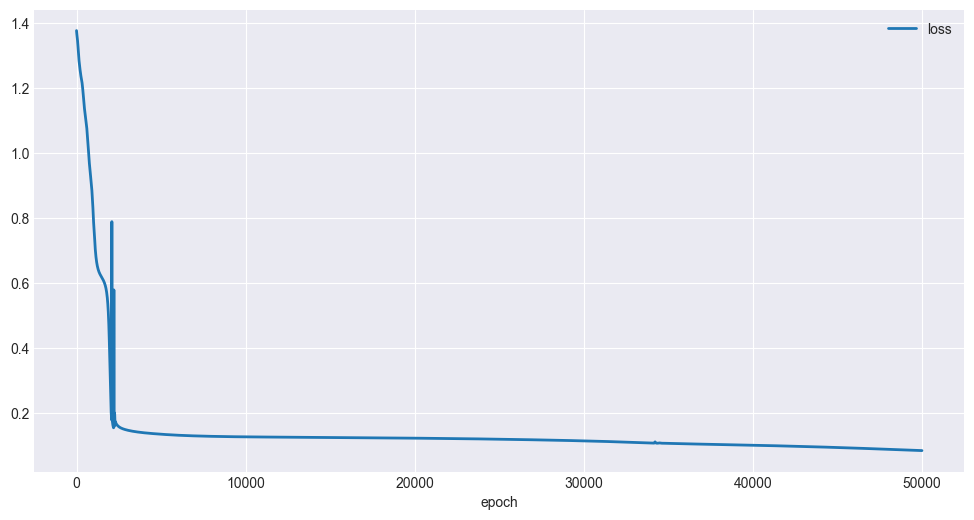

In [16]:
model, train_losses = build_model(layer_params, X_train, y_train)

In [17]:
# training accuracy score
y_pred, dec_bounds = predict(model, X_train)
train_accuracy = accuracy_score(y_true=y_train.argmax(axis=1), y_pred=y_pred)
display(train_accuracy)

0.97875

array([[390,  10],
       [  7, 393]])

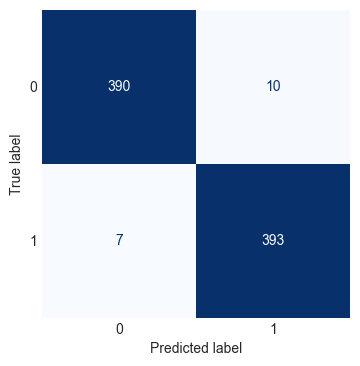

In [18]:
# confusion matrix for train
cm = confusion_matrix(y_true=y_train.argmax(axis=1), y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
display(cm)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)

In [19]:
 # testing accuracy score
y_pred, dec_bounds = predict(model, X_test)
test_accuracy = accuracy_score(y_true=y_test.argmax(axis=1), y_pred=y_pred)
display(test_accuracy)

0.975

array([[99,  1],
       [ 4, 96]])

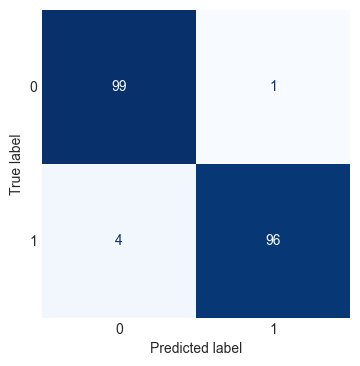

In [20]:
# confusion matrix for test
cm = confusion_matrix(y_true=y_test.argmax(axis=1), y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
display(cm)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)

(2, 35)

(35, 50)

(50, 25)

(25, 14)

(14, 2)

Loss after     0 epochs: 1.39644
Loss after  1000 epochs: 1.00160
Loss after  2000 epochs: 0.70030
Loss after  3000 epochs: 0.12183
Loss after  4000 epochs: 0.06922
Loss after  5000 epochs: 0.06240
Loss after  6000 epochs: 0.05737
Loss after  7000 epochs: 0.05325
Loss after  8000 epochs: 0.04963
Loss after  9000 epochs: 0.04625
Loss after 10000 epochs: 0.04288
Loss after 11000 epochs: 0.03893
Loss after 12000 epochs: 0.03357
Loss after 13000 epochs: 0.02827
Loss after 14000 epochs: 0.02499
Loss after 15000 epochs: 0.02299
Loss after 16000 epochs: 0.02160
Loss after 17000 epochs: 0.02053
Loss after 18000 epochs: 0.01965
Loss after 19000 epochs: 0.01891
Loss after 20000 epochs: 0.01828
Loss after 21000 epochs: 0.01772
Loss after 22000 epochs: 0.01722
Loss after 23000 epochs: 0.01675
Loss after 24000 epochs: 0.01627
Loss after 25000 epochs: 0.01567
Loss after 26000 epochs: 0.01486
Loss after 27000 epochs: 0.01378
Loss after 28000 epochs: 0.01224
Loss after 29000 epochs: 0.01019
Loss after

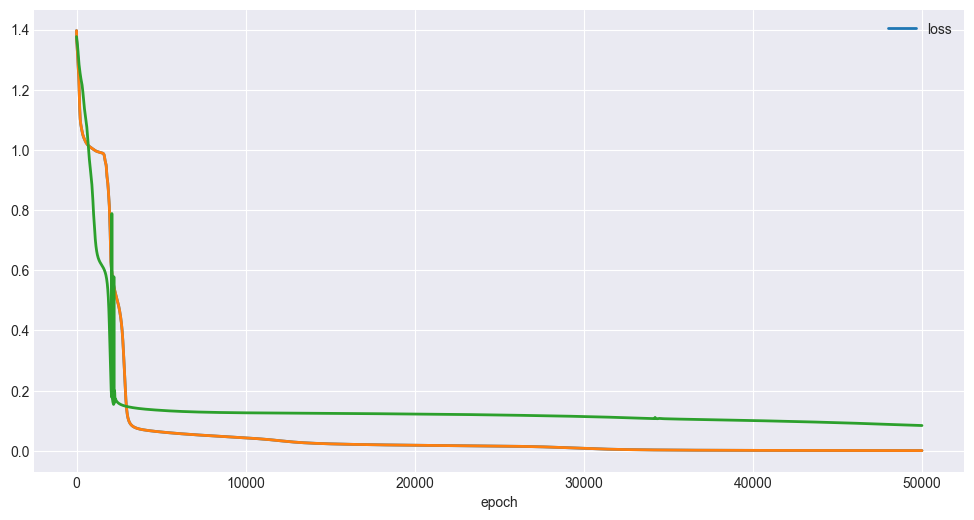

In [21]:
# graph for train, test accuracies. If the testing plot increases, it is an indication that the graph has started overfitting
# testing model
model_t, test_loss = build_model(layer_params, X_test, y_test)
plt.plot(test_loss['epoch'], test_loss['loss'])
plt.plot(train_losses['epoch'], train_losses['loss'])
plt.show()

(2, 35)

(35, 50)

(50, 25)

(25, 14)

(14, 2)

Loss after     0 epochs: 1.38741
Loss after  1000 epochs: 0.93383
Loss after  2000 epochs: 0.20282
Loss after  3000 epochs: 0.15113
Loss after  4000 epochs: 0.14764
Loss after  5000 epochs: 0.14535
Loss after  6000 epochs: 0.14326
Loss after  7000 epochs: 0.14100
Loss after  8000 epochs: 0.13839
Loss after  9000 epochs: 0.13570
Loss after 10000 epochs: 0.13359
Loss after 11000 epochs: 0.13213
Loss after 12000 epochs: 0.13099
Loss after 13000 epochs: 0.13000
Loss after 14000 epochs: 0.12911
Loss after 15000 epochs: 0.12827
Loss after 16000 epochs: 0.12750
Loss after 17000 epochs: 0.12679
Loss after 18000 epochs: 0.12614
Loss after 19000 epochs: 0.12555
Loss after 20000 epochs: 0.12500
Loss after 21000 epochs: 0.12447
Loss after 22000 epochs: 0.12394
Loss after 23000 epochs: 0.12336
Loss after 24000 epochs: 0.12269
Loss after 25000 epochs: 0.12190
Loss after 26000 epochs: 0.12101
Loss after 27000 epochs: 0.12009
Loss after 28000 epochs: 0.11919
Loss after 29000 epochs: 0.11832
Loss after

array([[-1.379, -1.329, -1.279, ...,  2.271,  2.321,  2.371],
       [-1.379, -1.329, -1.279, ...,  2.271,  2.321,  2.371],
       [-1.379, -1.329, -1.279, ...,  2.271,  2.321,  2.371],
       ...,
       [-1.379, -1.329, -1.279, ...,  2.271,  2.321,  2.371],
       [-1.379, -1.329, -1.279, ...,  2.271,  2.321,  2.371],
       [-1.379, -1.329, -1.279, ...,  2.271,  2.321,  2.371]])

array([[-0.955, -0.955, -0.955, ..., -0.955, -0.955, -0.955],
       [-0.905, -0.905, -0.905, ..., -0.905, -0.905, -0.905],
       [-0.855, -0.855, -0.855, ..., -0.855, -0.855, -0.855],
       ...,
       [ 1.495,  1.495,  1.495, ...,  1.495,  1.495,  1.495],
       [ 1.545,  1.545,  1.545, ...,  1.545,  1.545,  1.545],
       [ 1.595,  1.595,  1.595, ...,  1.595,  1.595,  1.595]])

(76,)

(52,)

'shape of xx: (52, 76), shape of yy: (52, 76)'

'shape of xx ravel: (3952,), shape of yy ravel: (3952,)'

'Shape of XX: (3952, 2)'

'Shape of Z before reshape: (3952,)'

'Shape of Z after reshape: (52, 76)'

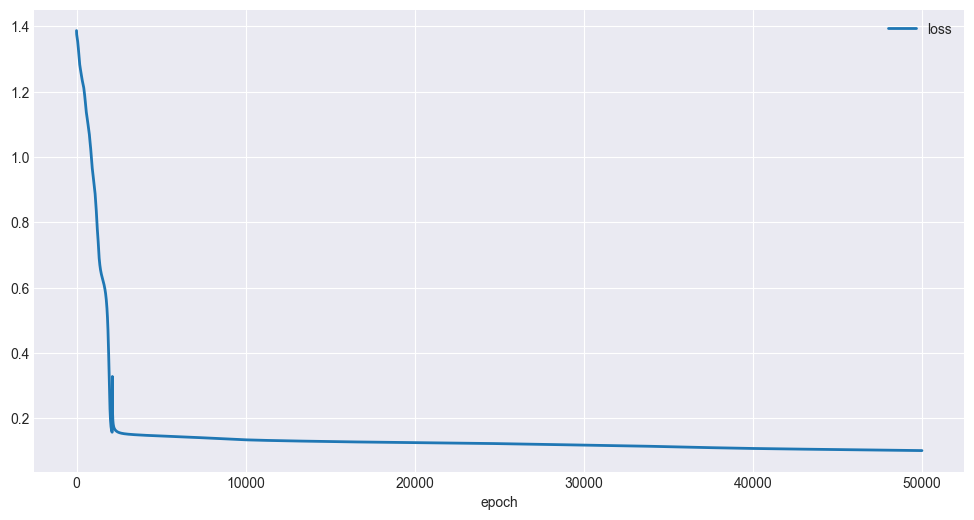

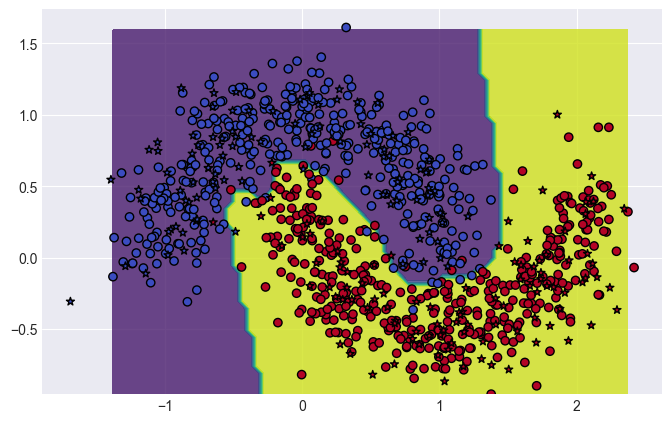

In [23]:
# plotting decision boundary
def fn_plot_decision_boundary(model, X_tr, y_tr, X_ts, y_ts):
    fig, ax = plt.subplots(figsize=(8,5))
    dm = 0.05 # incremental step for decision boundary. Increase this value to view a more rugged decision boundary. Decrease this value to view a more smoother, accurate decision boundary
    # figuring out the minimum and maximum along the two axes
    x_min, x_max = X_tr[:, 0].min(), X_tr[:, 0].max()
    y_min, y_max = X_tr[:, 1].min(), X_tr[:, 1].max()
    # generating a meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), np.arange(y_min, y_max, dm))
    display(xx, yy)
    display((np.arange(x_min, x_max, dm)).shape, (np.arange(y_min, y_max, dm)).shape )
    display(f"shape of xx: {xx.shape}, shape of yy: {yy.shape}")
    # unraveling the 2d array to a 1d array(Flattening the array)
    XX = np.c_[xx.ravel(), yy.ravel()]
    display(f"shape of xx ravel: {xx.ravel().shape}, shape of yy ravel: {yy.ravel().shape}")
    display(f"Shape of XX: {XX.shape}")
    y_pred, dec_bound  = predict(model, XX)
    
    # reshaping the 1d array to a 2d array
    Z = np.array(y_pred)
    display(f"Shape of Z before reshape: {Z.shape}")
    Z = Z.reshape(xx.shape)
    display(f"Shape of Z after reshape: {Z.shape}")
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.viridis)
    ax.scatter(X_tr[:,0], X_tr[:,1], c =y_tr.argmax(axis=1), edgecolors='k', cmap=CMAP, marker='o')
    ax.scatter(X_ts[:,0], X_ts[:,1], c =y_ts.argmax(axis=1), edgecolors='k', cmap=CMAP, marker='*')

model, train_loss = build_model(layer_params, X_train,y_train)
fn_plot_decision_boundary(model, X_train, y_train, X_test, y_test)

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

dense_matrix = np.array([
    [1, 0, 0],
    [0, 0, 0],
    [0, 0, 1]
])

# Convert to sparse matrix
sparse_matrix = csr_matrix(dense_matrix)
print(sparse_matrix)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1
  (2, 2)	1


In [ ]:
sparsetodense = sparse_matrix.todense()
sparsetodense

matrix([[1, 0, 0],
        [0, 0, 0],
        [0, 0, 1]])